In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [ ]:
def normalize(arr):
    mu = np.mean(arr)
    sigma = np.std(arr)
    for i in np.arange(len(arr)):
        arr[i] = (arr[i] - mu) / sigma
    
    return arr

In [ ]:
data = pd.read_csv("train.csv")
x_train = normalize(np.array(data['x']))
y_train = np.array(data['y'])

In [ ]:
w_init = 10
b_init = 0

In [ ]:
def calcSquaredError(x, y, w, b): 
    squaredError = 0
    for i in np.arange(len(x)):
        y_hat = w * x[i] + b
        error = y_hat - y[i]
        squaredError += error**2
    return squaredError


def getPartialDerivatives(x,y,w,b):
    m = len(x)
    dj_dw = 0
    dj_db = 0
    
    for i in np.arange(m):
        y_hat = w * x[i] + b
        error = y_hat - y[i]
        dj_dw += x[i] * error
        dj_db += error
    
    dj_dw *= 1/m
    dj_db *= 1/m
    
    return dj_dw, dj_db
    
def univariateLinearRegression(x_train, y_train, w_init, b_init, alpha): 
    m = len(x_train)
    w = w_init
    b = b_init
    J_hist = np.zeros(100)

    for i in np.arange(100):
        J = (1 / (2*m)) * calcSquaredError(x_train, y_train, w, b)
        J_hist[i] = J
        dj_dw, dj_db = getPartialDerivatives(x_train, y_train, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    
    plt.plot(np.arange(100), J_hist)
    plt.xlabel('Iteration #')
    plt.ylabel('Cost')
    plt.title('Model cost vs. iteration')
    return w, b

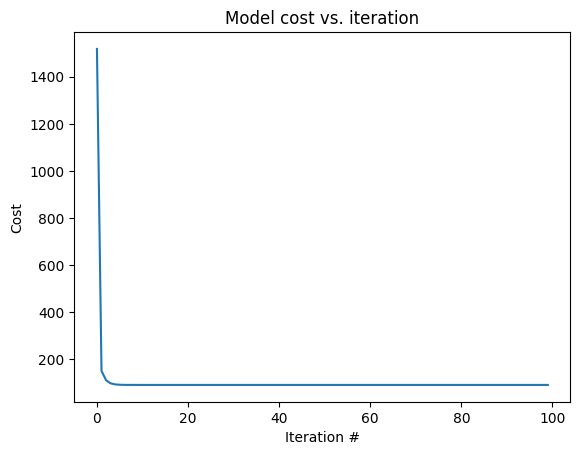

In [ ]:
alpha = 1
w_final, b_final = univariateLinearRegression(x_train, y_train, w_init, b_init, alpha)

In [ ]:
data = pd.read_csv("test.csv")
x_test = normalize(np.array(data['x']))
y_test = np.array(data['y'])

In [ ]:
def calculateRMSE(x_test, y_test, w, b):
    m = len(x_test)
    squaredError = 0
    for i in np.arange(m):
        y_hat = w * x_test[i] + b
        error = y_hat - y_test[i]
        squaredError += error**2
    
    return math.sqrt(squaredError / m)

In [ ]:
calculateRMSE(x_test, y_test, w_final, b_final)

13.350895180551785